In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [3]:
pelis=pd.read_csv("imdb_top_1000.csv")
pelis.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
datos_columna=pd.read_csv("imdb_top_1000.csv", usecols=["Released_Year","IMDB_Rating","No_of_Votes"])
datos_columna.head()

,Released_Year,IMDB_Rating,No_of_Votes
0,1994,9.3,2343110
1,1972,9.2,1620367
2,2008,9.0,2303232
3,1974,9.0,1129952
4,1957,9.0,689845


In [84]:
#Idea
#Por género cuántas peliculas hay en el top y su media de calificación

#pelis_propiedades=pelis.groupby("Genre").agg({"IMDB_Rating":[np.size,np.mean]})
#pelis_propiedades

In [83]:
#Idea
#Hacer escala de datos para preparar el modelo

#rating_genero=pd.DataFrame(pelis_propiedades["IMDB_Rating"]["size"])
#pelis_escaladas=rating_genero.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
#pelis_escaladas.head()


In [6]:
#En el modelo se eliminaron variables categóricas
from sklearn.model_selection import train_test_split
x_train, x_,y_train,y_=train_test_split(datos_columna,datos_columna.IMDB_Rating,test_size=.3)
x_val,x_test, y_val, y_test=train_test_split(x_,y_,test_size=.3)

In [7]:
x_train

,Released_Year,IMDB_Rating,No_of_Votes
133,2015,8.2,31142
595,2013,7.8,73690
711,1944,7.8,31053
459,1939,8.0,26725
328,2016,8.0,213970
...,...,...,...
143,2009,8.2,193217
886,2015,7.6,35785
273,1982,8.1,31595
385,1999,8.0,82002


<AxesSubplot:>

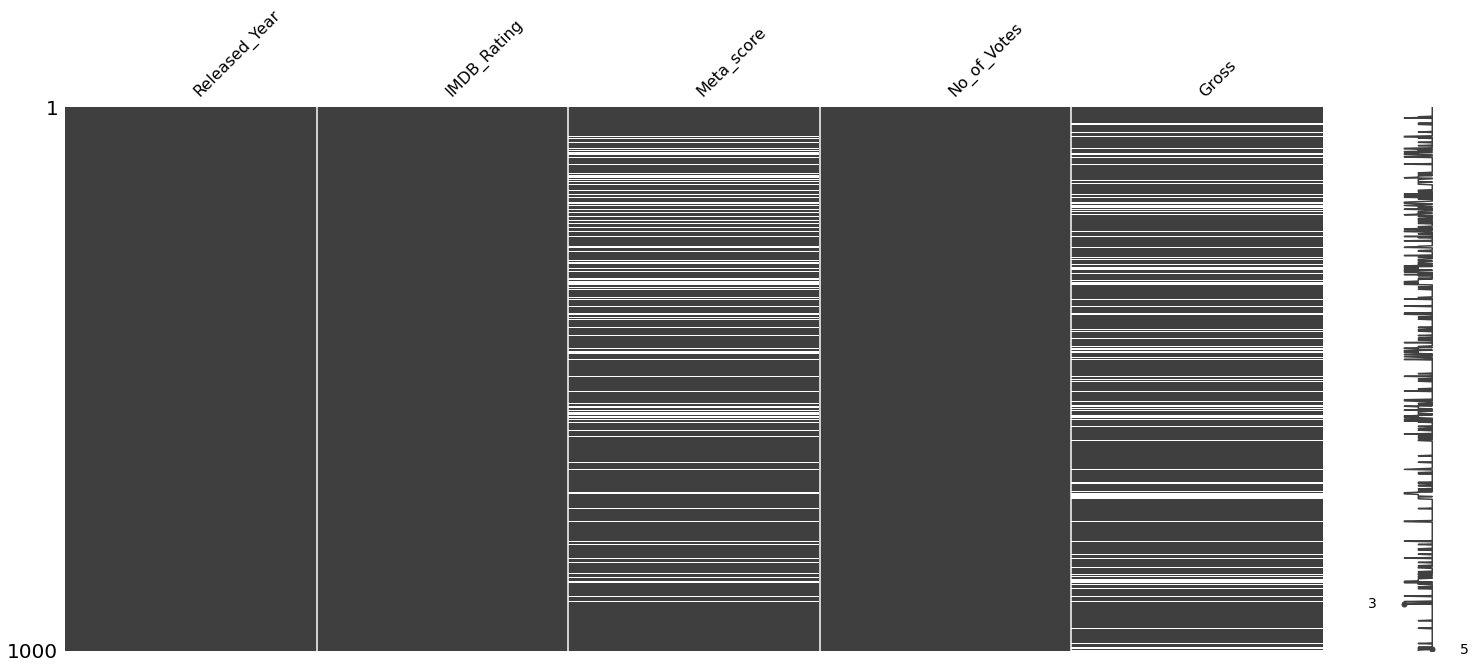

In [93]:
#Datos faltantes
import missingno as msno
msno.matrix(datos_columna)

<AxesSubplot:>

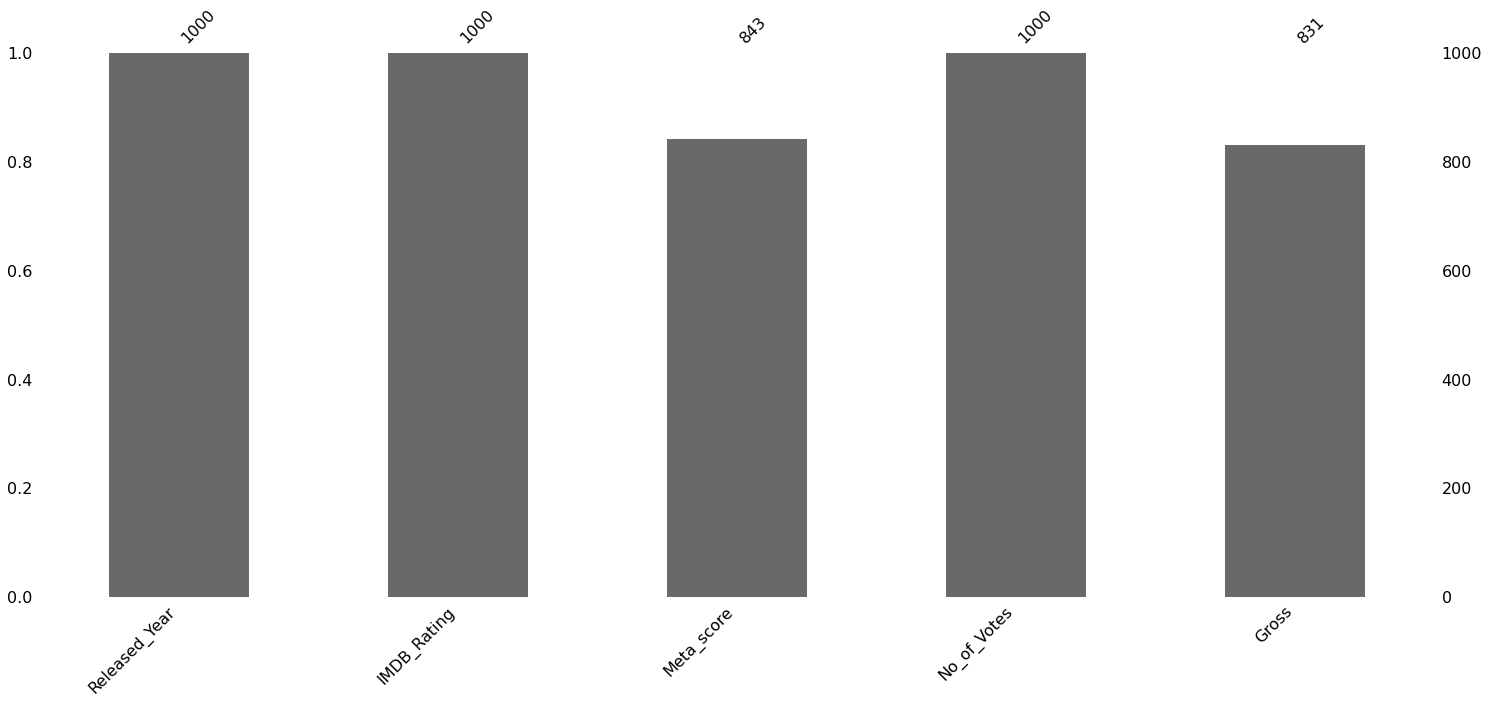

In [95]:
msno.bar(datos_columna)

In [14]:
#Estandarizar datos y construir el modelo OLS (mínimos cuadrados)
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

x=datos_columna[["Released_Year","No_of_Votes"]]
y=datos_columna["IMDB_Rating"]

x[["Released_Year","No_of_Votes"]]=scale.fit_transform(x[["Released_Year","No_of_Votes"]].values)

#Agregar una columna de intersección 

x=sm.add_constant(x)
print(x)

est = sm.OLS(y,x).fit()

print(est.summary())

     const  Released_Year  No_of_Votes
0      1.0       0.119404     6.324451
1      1.0      -0.825856     4.115639
2      1.0       0.720933     6.202578
3      1.0      -0.739924     2.616857
4      1.0      -1.470352     1.271824
..     ...            ...          ...
995    1.0      -1.298486    -0.327463
996    1.0      -1.513318    -0.732308
997    1.0      -1.642217    -0.703889
998    1.0      -2.028914    -0.755547
999    1.0      -2.415612    -0.677976

[1000 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:            IMDB_Rating   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     225.9
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.24e-81
Time:                        15:50:10   Log-Likelihood:                 57.617
No. Observations:                

C:\Users\kevin\AppData\Local\Temp\ipykernel_28056\2890539372.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[["Released_Year","No_of_Votes"]]=scale.fit_transform(x[["Released_Year","No_of_Votes"]].values)


In [17]:
#Predicción usando regresión múltiple. Auto con del año 1963 con 100000 votantes
prediccion=scale.transform([[1963,100000]]) #año, votantes
prediccion=np.insert(prediccion[0],0,1) #agregar constante de intersección como se hizo en el modelo
print(prediccion)
resultado=est.predict(prediccion)
print(resultado)

[ 1.         -1.21255357 -0.53083174]
[7.95648208]


La predicción tiene sentido porque generalmente las películas clásicas y populares obtienen mejor calificaciones.

In [24]:
prediccion=scale.transform([[2023,2345]]) #año,votantes
prediccion=np.insert(prediccion[0],0,1) #agregar constante de intersección como se hizo en el modelo
print(prediccion)
resultado=est.predict(prediccion)
print(resultado)

[ 1.          1.36542787 -0.82928016]
[7.72140639]


Mientras que para una película moderna se espera una menor calificación, como lo dice el modelo. Se pueden construir modelos más sofisticados pero requieren más datos completos numéricos o quizá sería más apropiado buscar otro modelo de machine learning...